# Heart Disease Prediction (Classification) 🩺

**Project Objective:** To build a machine learning model that can accurately predict whether a patient has heart disease based on a set of medical attributes. This project will serve as a comprehensive introduction to classification, one of the most common types of machine learning problems.


### Core Concepts:
1.  **Classification Fundamentals:** Understanding the goal of predicting a discrete category.
2.  **Exploratory Data Analysis (EDA) for Classification:** Analyzing features to find patterns that distinguish between classes.
3.  **Data Preprocessing:** 
4.  **Model Building:**
5.  **Model Evaluation:** Mastering key classification metrics like Accuracy, Precision, Recall, F1-Score, and interpreting the Confusion Matrix.
6.  **Feature Importance:** Identifying the most influential medical factors for predicting heart disease.

### **What is Classification?**

Classification is a type of supervised machine learning task where the goal is to predict a **discrete category or class label**. This is different from regression, where we predict a continuous numerical value.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import kagglehub


## Loading the data

In [2]:
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Initial inspection

In [3]:
df.shape

(920, 16)

In [4]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

## Data cleaning / Filling missing Values 

1. handing missing 'trestbps' values

<Axes: >

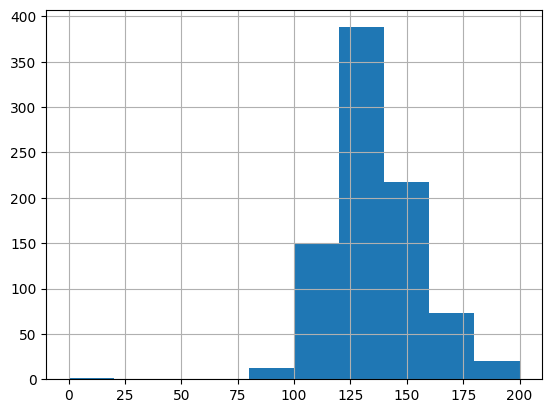

In [7]:
df['trestbps'].hist()

<Axes: >

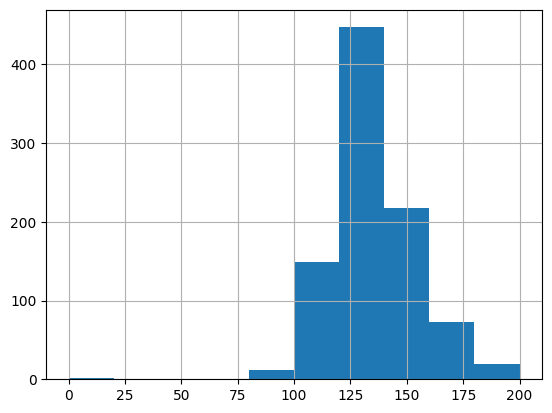

In [8]:
df['trestbps'].fillna(df['trestbps'].median()).hist()

In [9]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())

2. handing missing 'chol' values

In [10]:
df['chol'].describe()

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64

<Axes: >

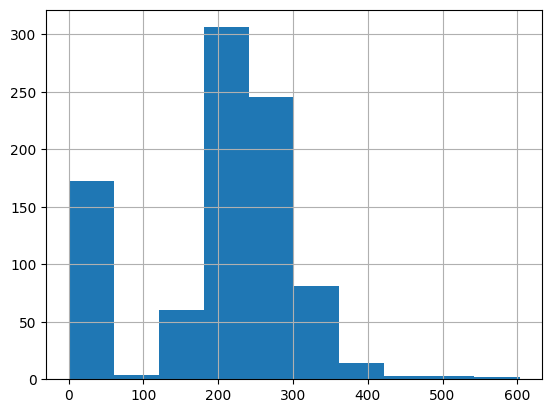

In [11]:
df['chol'].hist()

In [12]:
df['chol'] = df['chol'].fillna(df['chol'].median())

3. handing missing 'fbs' values

In [13]:
(df['fbs'].value_counts() / df['fbs'].notna().sum()) * 100

fbs
False    83.373494
True     16.626506
Name: count, dtype: float64

In [14]:
percent = (df['fbs'].isna().sum() / df['fbs'].notna().sum()) * 100
f"PErcentage of missing vaues: {percent:.2f}%"

'PErcentage of missing vaues: 10.84%'

<Axes: xlabel='fbs'>

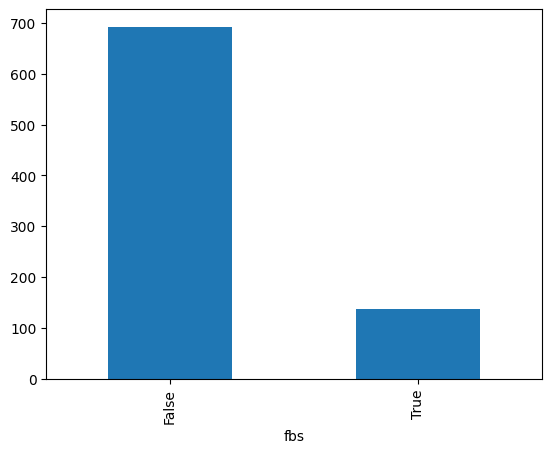

In [15]:
df['fbs'].value_counts().plot(kind='bar')

In [16]:
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])

/var/folders/fz/c_tklfjd1tsc9y8_vtcmzyrr0000gn/T/ipykernel_54480/2214830989.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])


4. handing missing 'restecg' values

In [17]:
(df['restecg'].value_counts() / df['restecg'].notna().sum()) * 100

restecg
normal              60.021786
lv hypertrophy      20.479303
st-t abnormality    19.498911
Name: count, dtype: float64

<Axes: ylabel='restecg'>

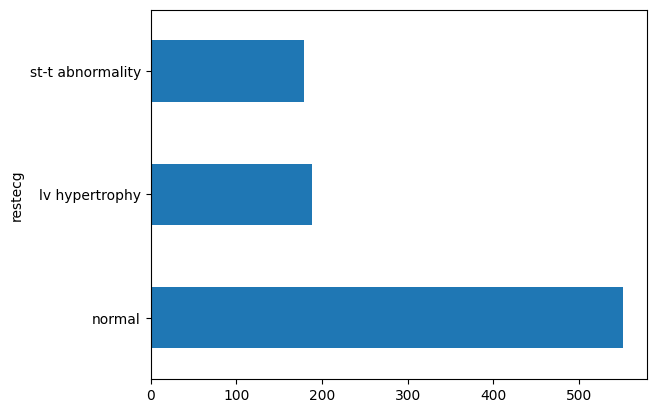

In [18]:
df['restecg'].value_counts().plot(kind='barh')

In [19]:
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
df['restecg'].isna().sum()

np.int64(0)

5. handing missing 'talch' values

<Axes: >

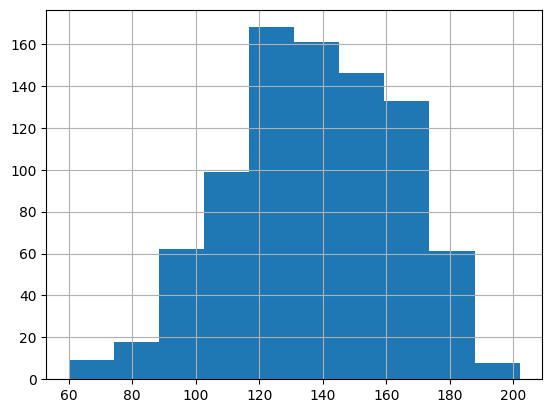

In [20]:
df['thalch'].hist()

In [21]:
df.thalch = df['thalch'].fillna(df['thalch'].median())

6. handing missing 'exang' values

<Axes: ylabel='exang'>

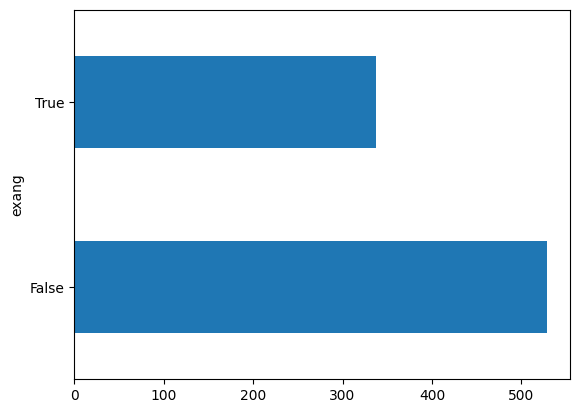

In [22]:
df['exang'].value_counts().plot(kind='barh')

In [23]:
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])

/var/folders/fz/c_tklfjd1tsc9y8_vtcmzyrr0000gn/T/ipykernel_54480/3192975667.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].fillna(df['exang'].mode()[0])


7. handing missing 'oldpeak' values

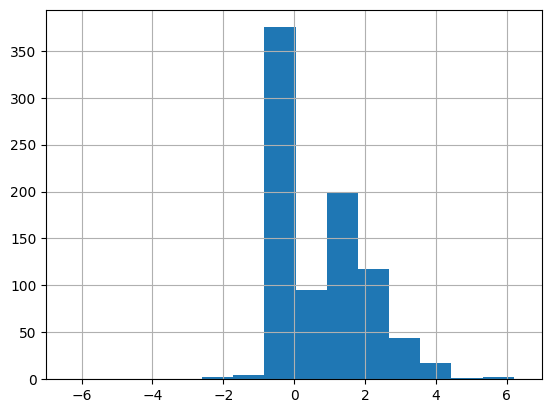

In [24]:
df['oldpeak'].hist()
plt.xlim(-7,7)
plt.show()

In [25]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

8. handing missing 'slope' values

In [26]:
print(f"Missing %: {(df.slope.isna().sum() / df.shape[0]) * 100:.2f}%")
display((df['slope'].value_counts() / df.slope.notna().sum()) * 100)
display((df['slope'].value_counts() / df.shape[0]) * 100)

Missing %: 33.59%


slope
flat           56.464812
upsloping      33.224223
downsloping    10.310966
Name: count, dtype: float64

slope
flat           37.500000
upsloping      22.065217
downsloping     6.847826
Name: count, dtype: float64

<Axes: xlabel='slope'>

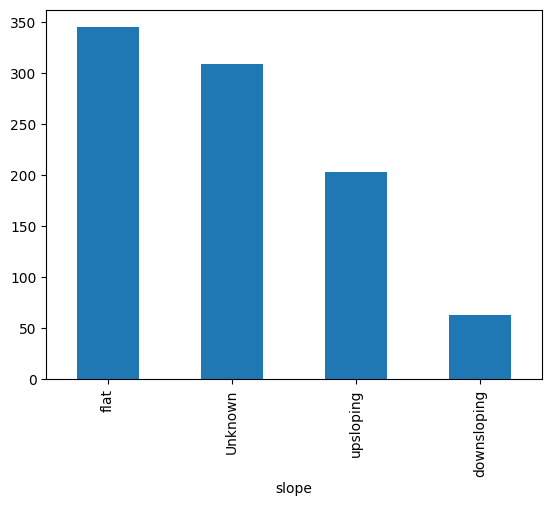

In [27]:
df.slope = df['slope'].fillna('Unknown')
df['slope'].value_counts().plot(kind='bar')

9. handing missing 'ca' values

CA (Major vessels) distribution:
ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

Missing values: 611


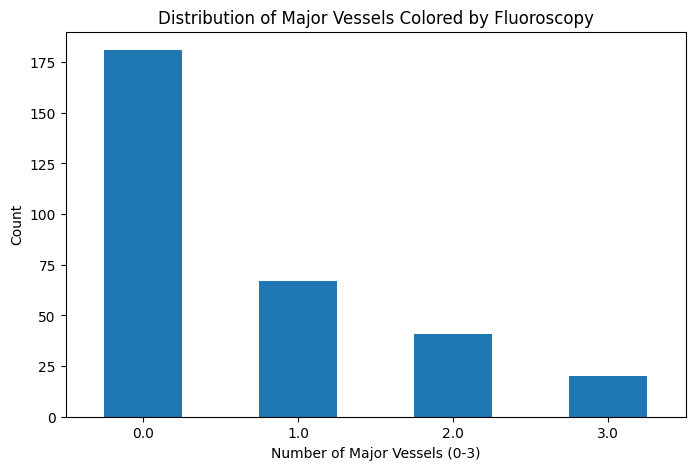

In [28]:
# Check the distribution of ca values
print("CA (Major vessels) distribution:")
print(df['ca'].value_counts().sort_index())
print(f"\nMissing values: {df['ca'].isna().sum()}")

# Visualize distribution
plt.figure(figsize=(8, 5))
df['ca'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Major Vessels Colored by Fluoroscopy')
plt.xlabel('Number of Major Vessels (0-3)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

craeting a new column 'has_ca'

In [29]:
df['has_ca'] = df['ca'].isna().astype(bool)
df['ca'] = df['ca'].fillna(-1)
df['ca'].value_counts().sort_index()

ca
-1.0    611
 0.0    181
 1.0     67
 2.0     41
 3.0     20
Name: count, dtype: int64

10. handing missing 'thal' values

<Axes: ylabel='thal'>

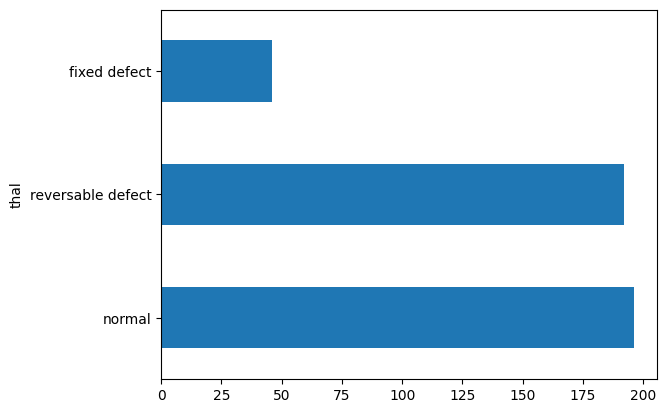

In [30]:
df['thal'].value_counts().plot(kind='barh')

creating a new column

<Axes: ylabel='thal'>

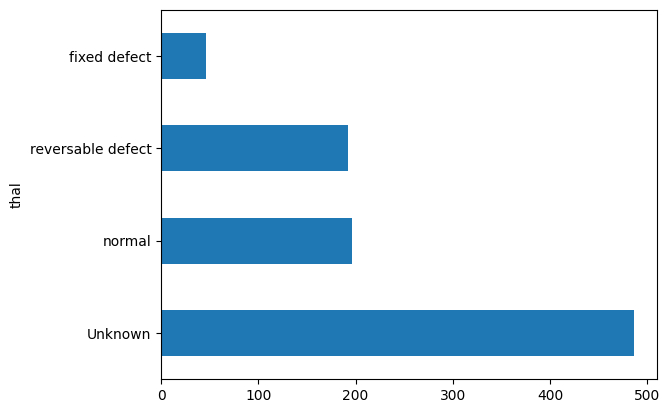

In [31]:
df['has_thal'] = df.thal.isna().astype(bool)
df['thal'] = df.thal.fillna('Unknown')
df.thal.value_counts().plot(kind='barh')

In [32]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,has_ca,has_thal
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,False,False
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,False,False
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,False,False
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,False,False
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,False,False


In [33]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'has_ca', 'has_thal'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
 16  has_ca    920 non-null    bool   
 17  has_thal  920 non-null    bool   
dtypes: bool(4), float64(5), int64(3), object(6)
memory usage: 104.3+ KB


In [35]:
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
has_ca      0
has_thal    0
dtype: int64

## Univariate analysis

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
 16  has_ca    920 non-null    bool   
 17  has_thal  920 non-null    bool   
dtypes: bool(4), float64(5), int64(3), object(6)
memory usage: 104.3+ KB


In [37]:
categorical_features = df.select_dtypes(exclude=[np.number]).columns
numerical_features = df.select_dtypes(include=[np.number]).columns

{
    'numerical_features': numerical_features,
    'categorical_features': categorical_features
}

{'numerical_features': Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object'),
 'categorical_features': Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal',
        'has_ca', 'has_thal'],
       dtype='object')}

In [38]:
categorical_features.shape

(10,)

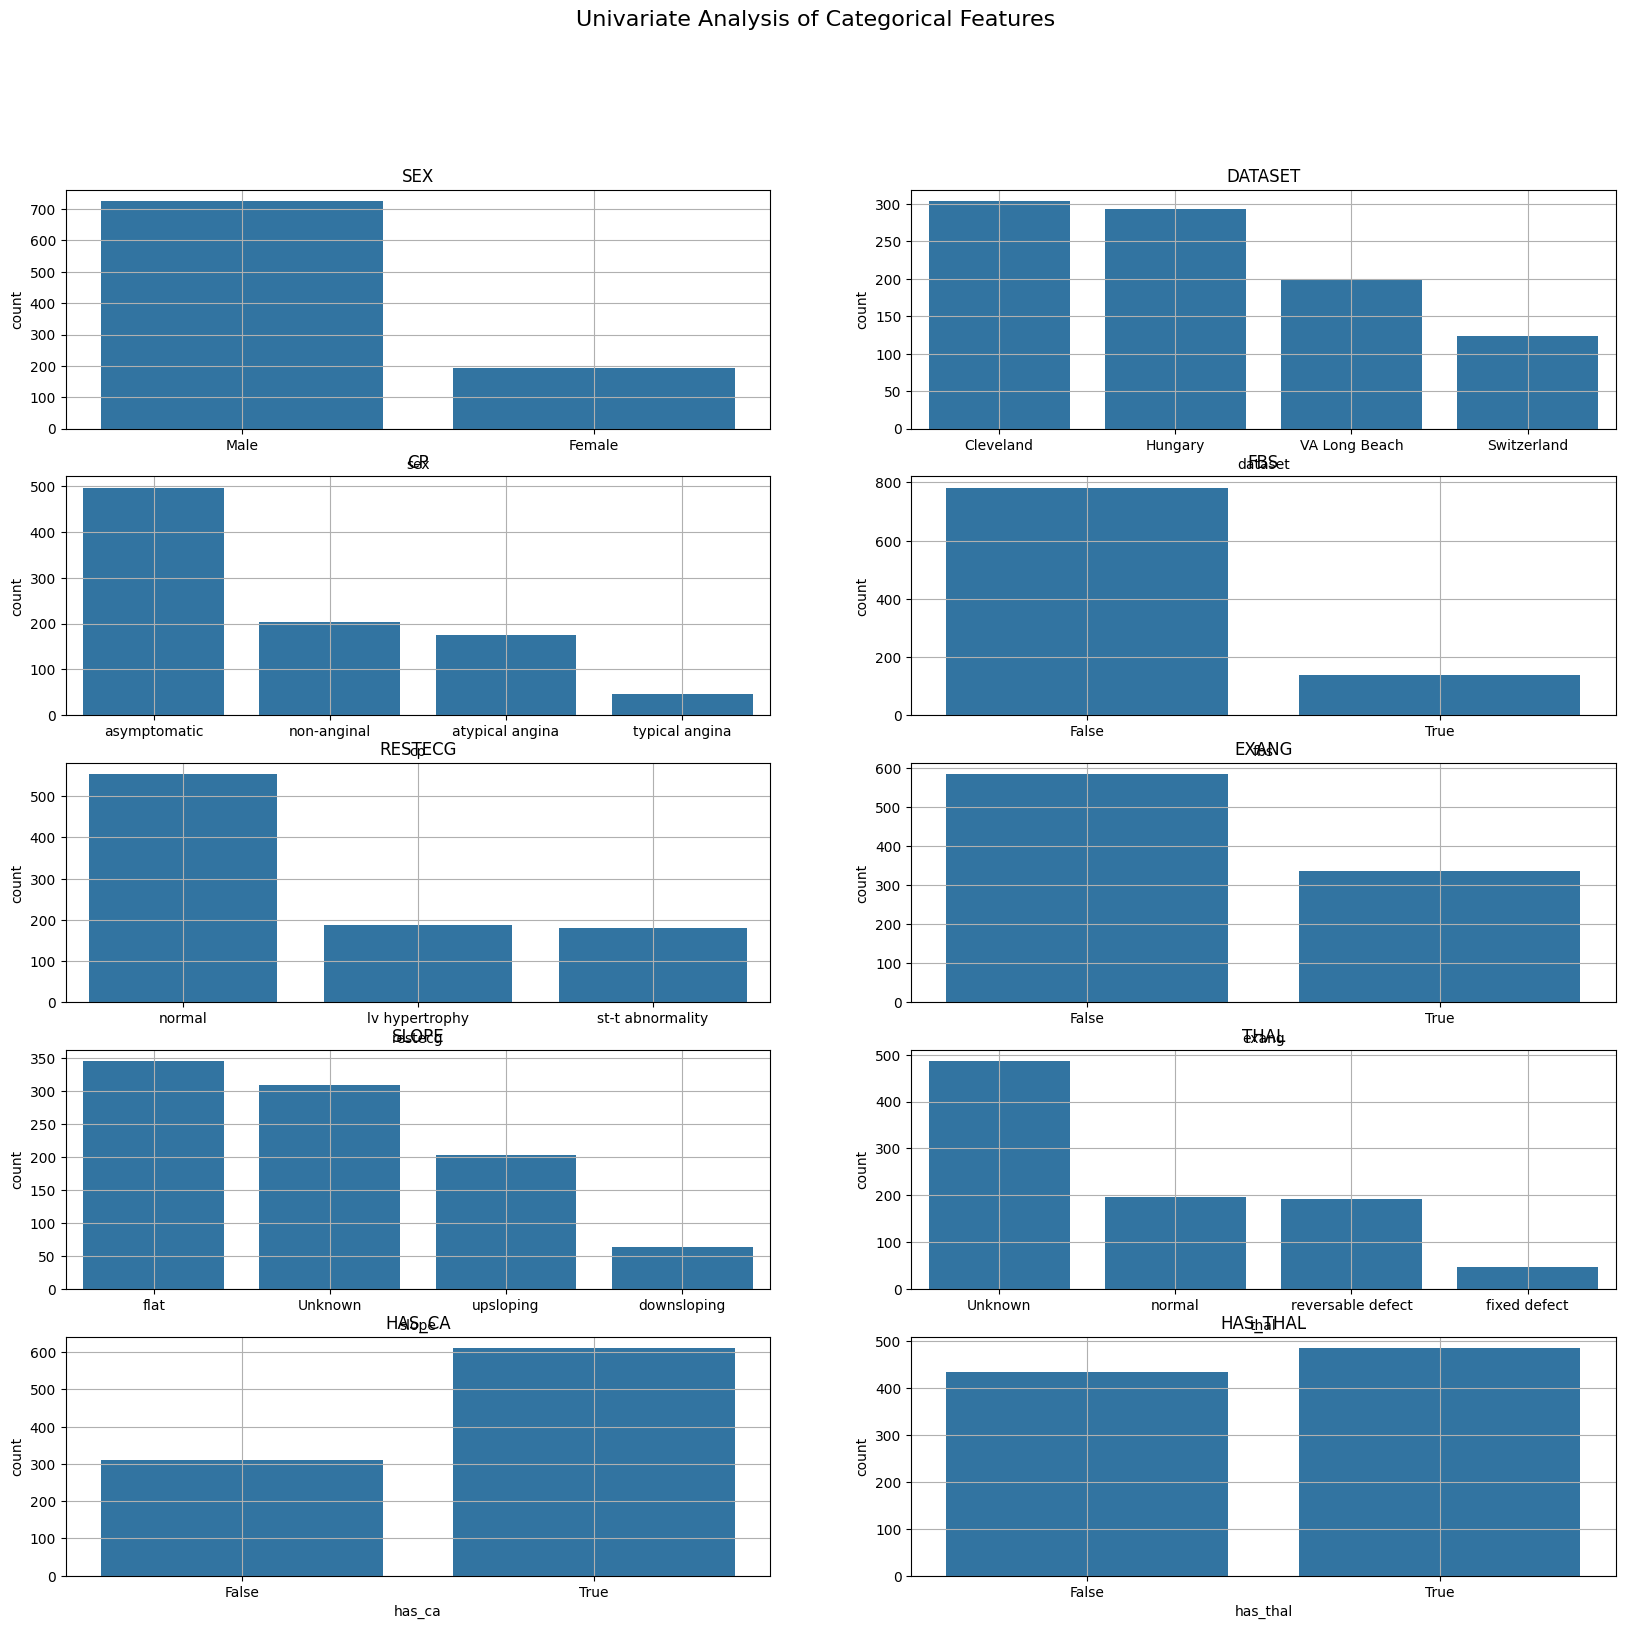

In [39]:
plt.figure(figsize=(20, 18))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.barplot(df[feature].value_counts())
    plt.title(feature.upper())
    plt.grid()

plt.show()

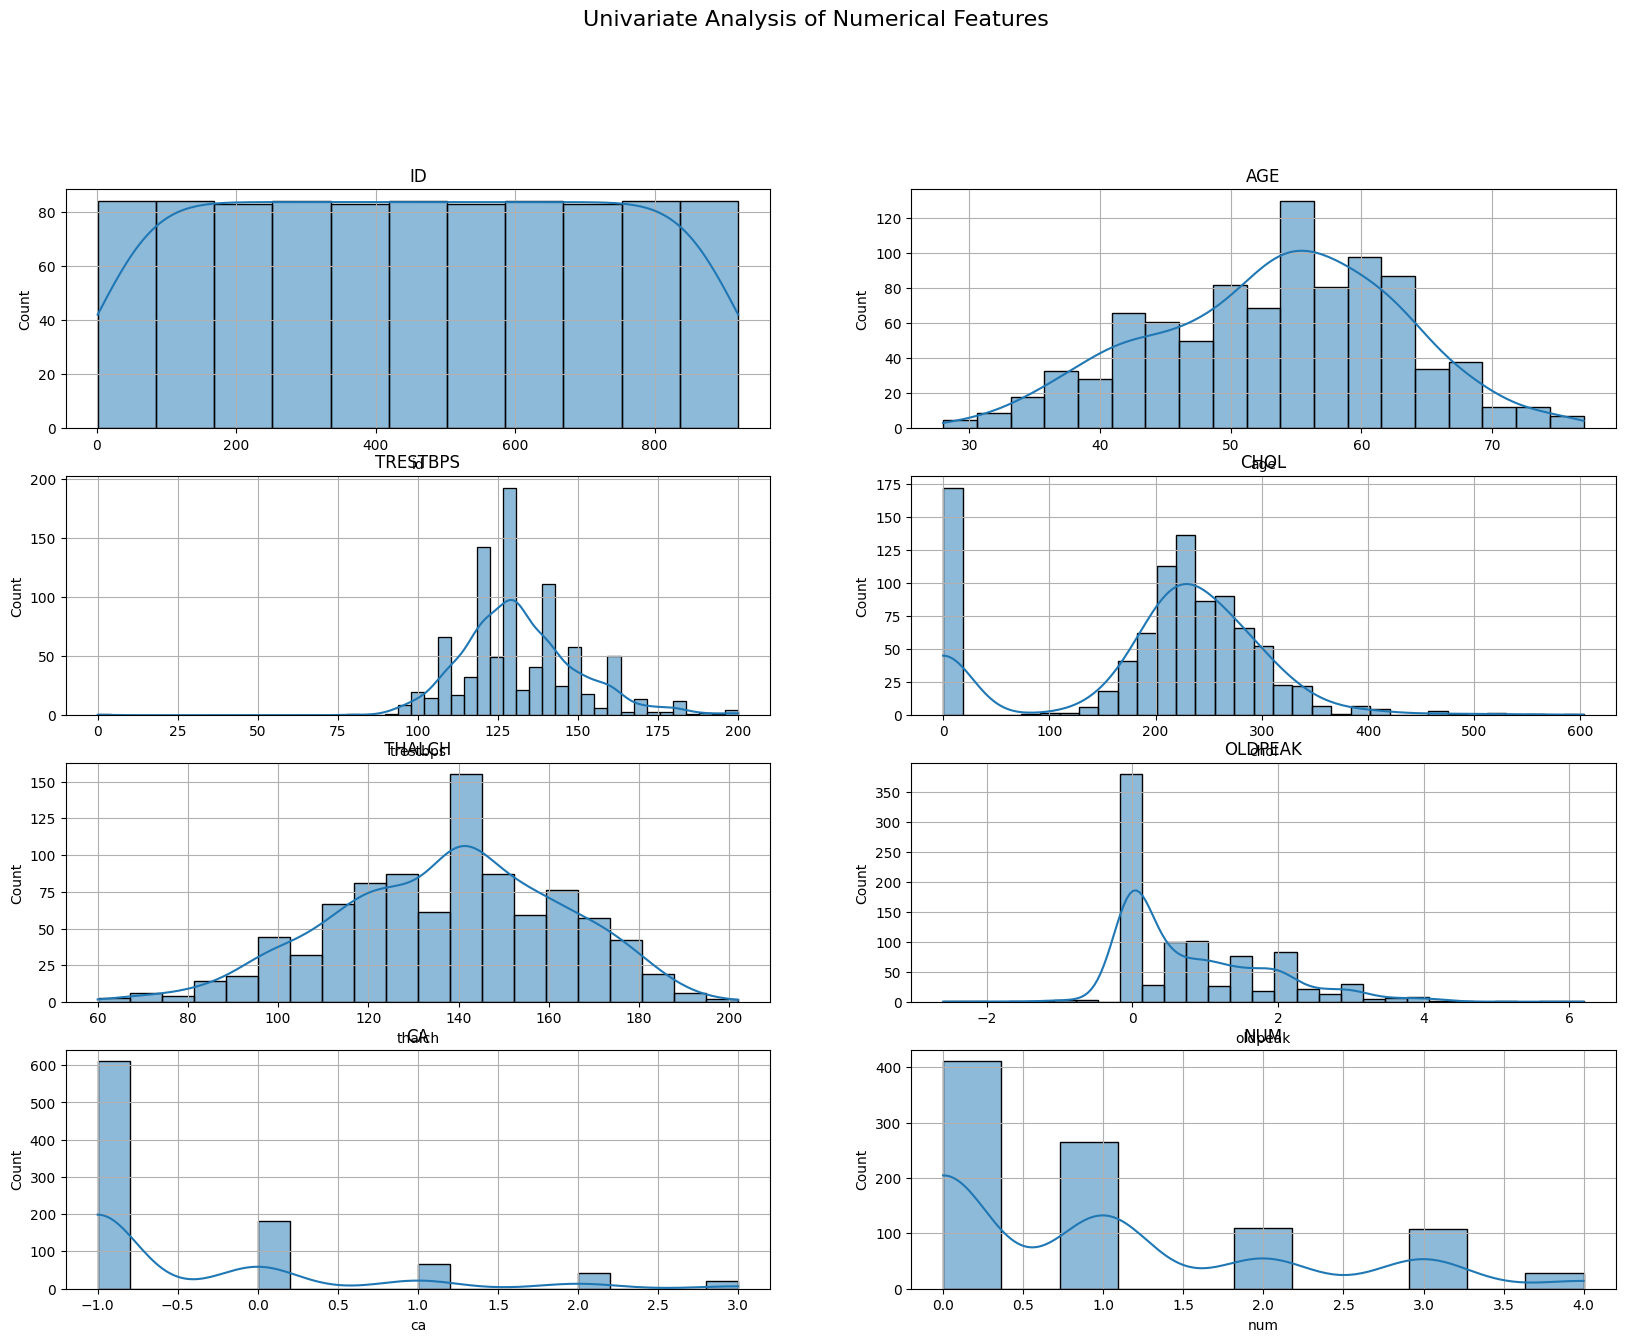

In [40]:
plt.figure(figsize=(20, 18))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature.upper())
    plt.grid()

plt.show()

## Bivariate Analysis

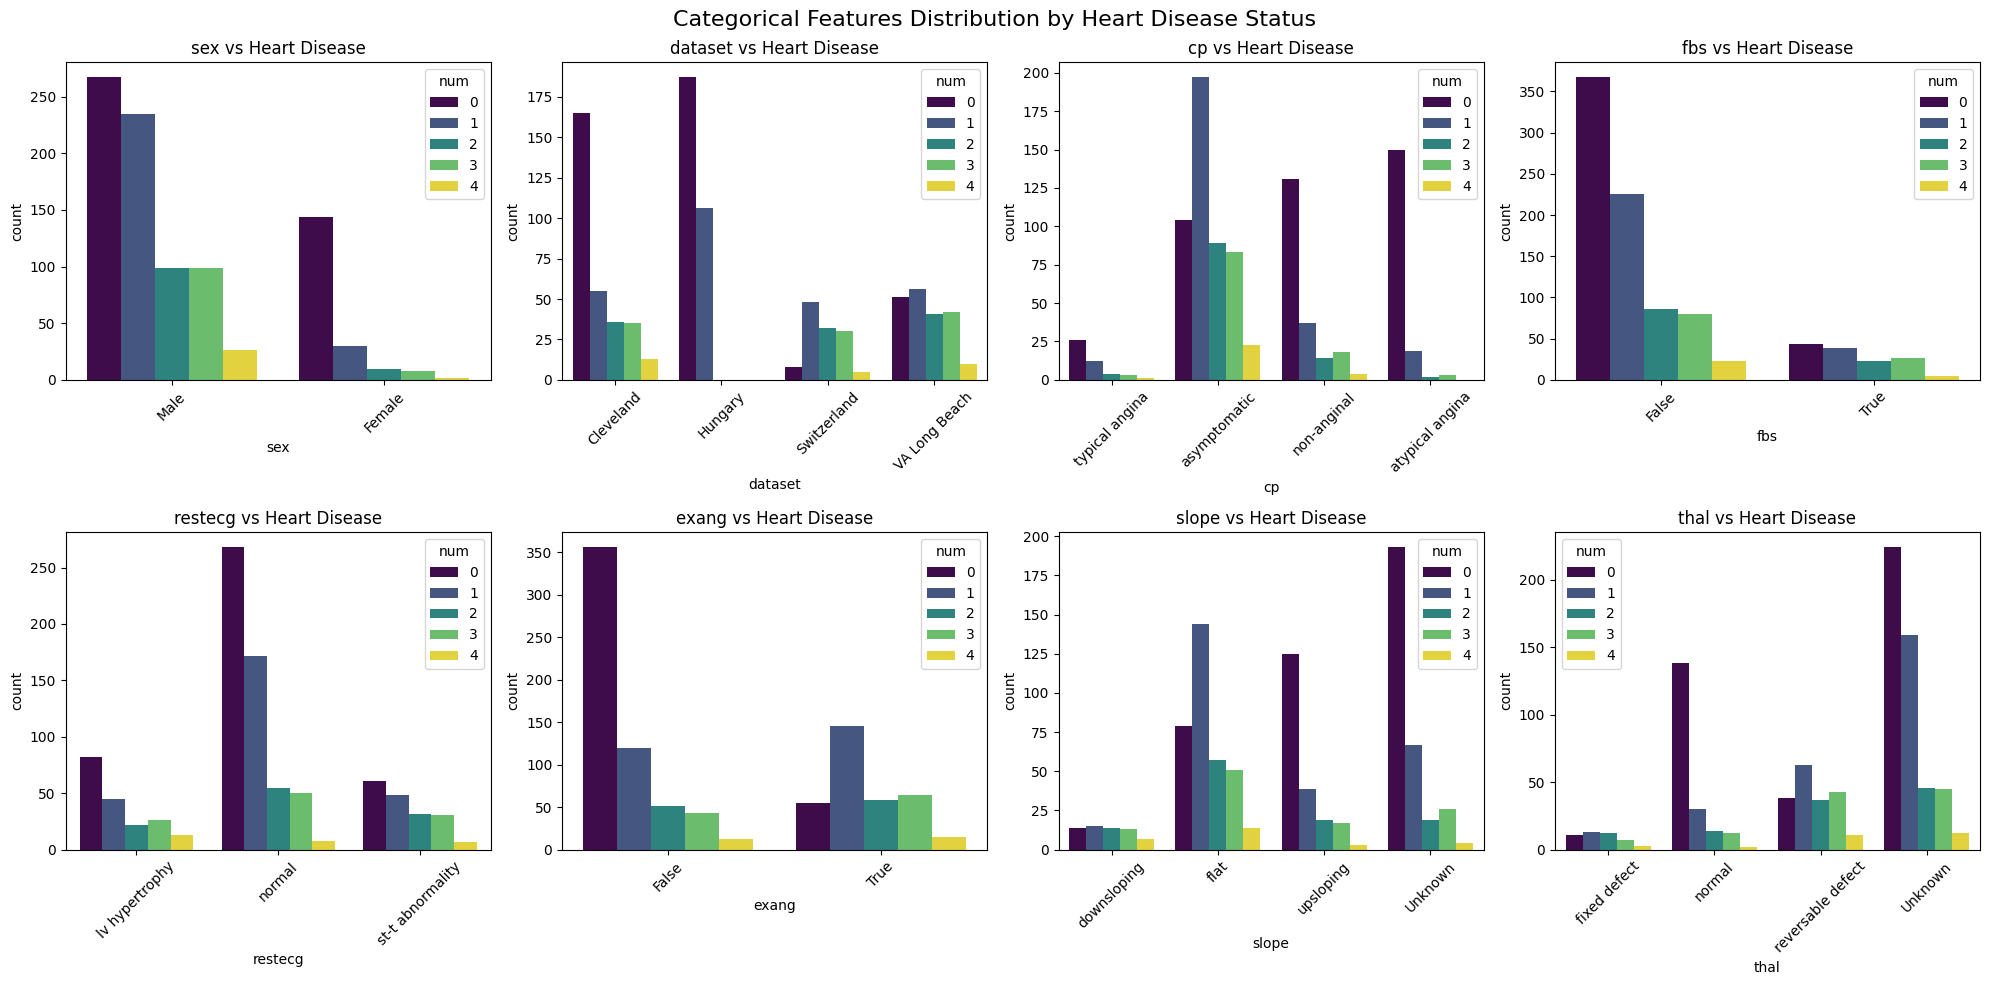

In [41]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Categorical Features Distribution by Heart Disease Status', fontsize=16)
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        sns.countplot(data=df, x=feature, hue='num', ax=axes[i], palette='viridis')
        axes[i].set_title(f'{feature} vs Heart Disease')
        axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplot
if len(categorical_features) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## Target Variable Distribution (num)

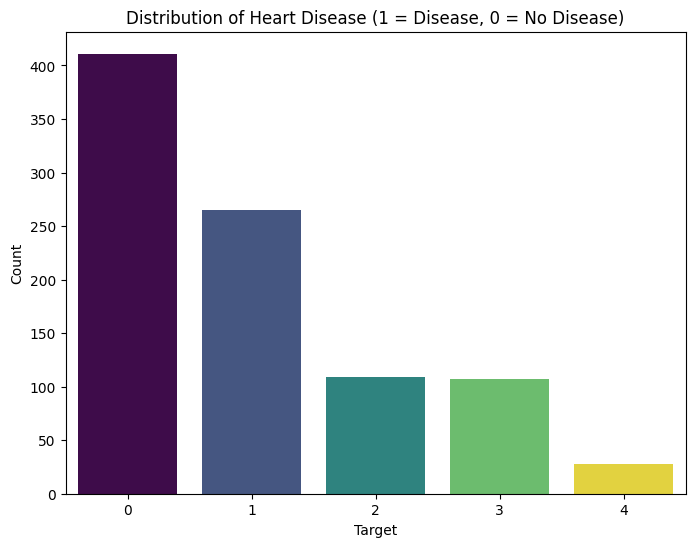

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=df, palette='viridis', hue='num', legend=False)
plt.title('Distribution of Heart Disease (1 = Disease, 0 = No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


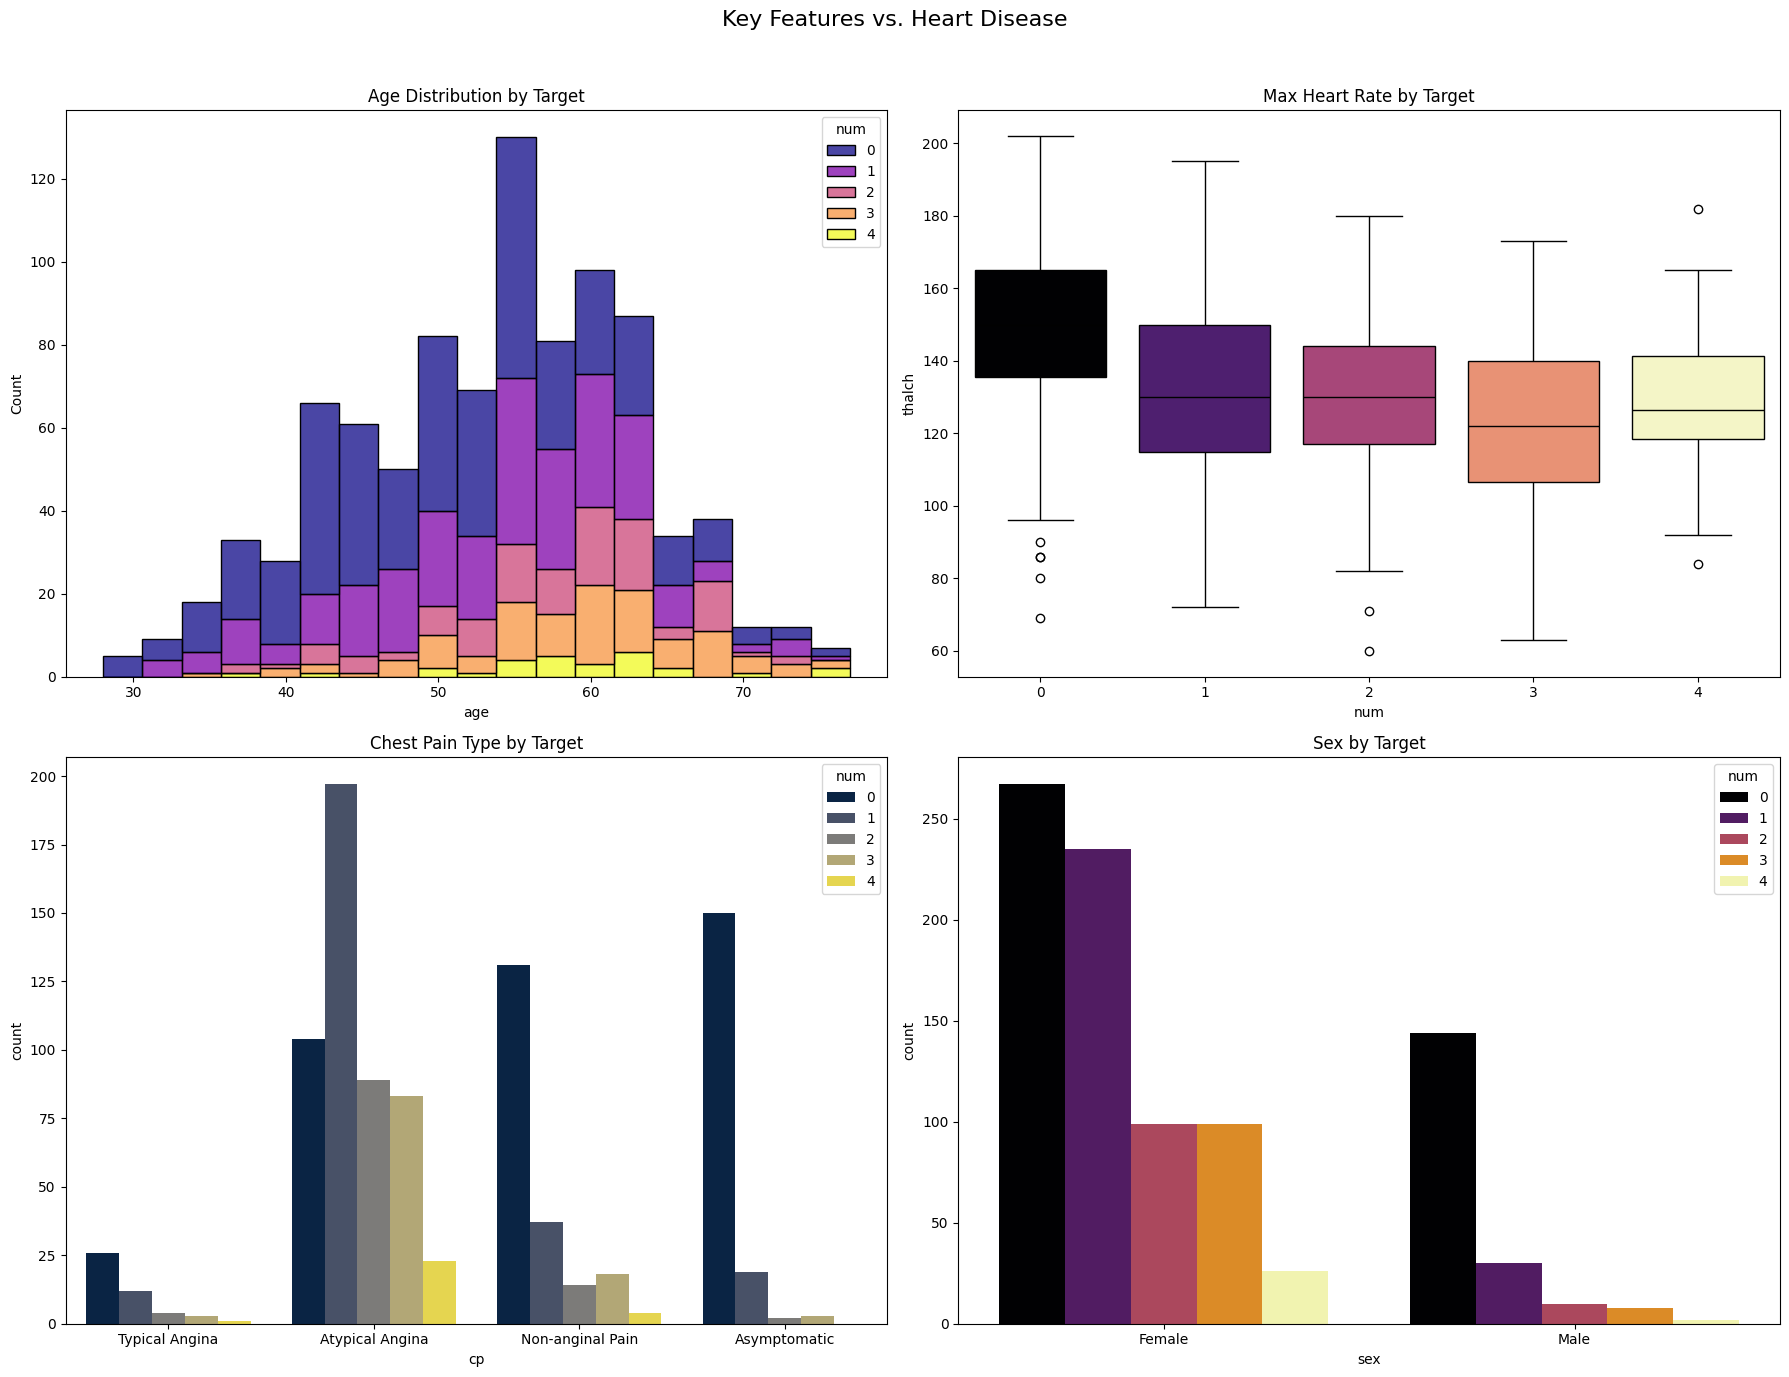

In [43]:
# Let's visualize the relationship between key features and the target
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

# Age vs. Target
sns.histplot(ax=axes[0, 0], data=df, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

# Max Heart Rate vs. Target
sns.boxplot(ax=axes[0, 1], data=df, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[1, 0], data=df, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[1, 1], data=df, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Correlation Matrix

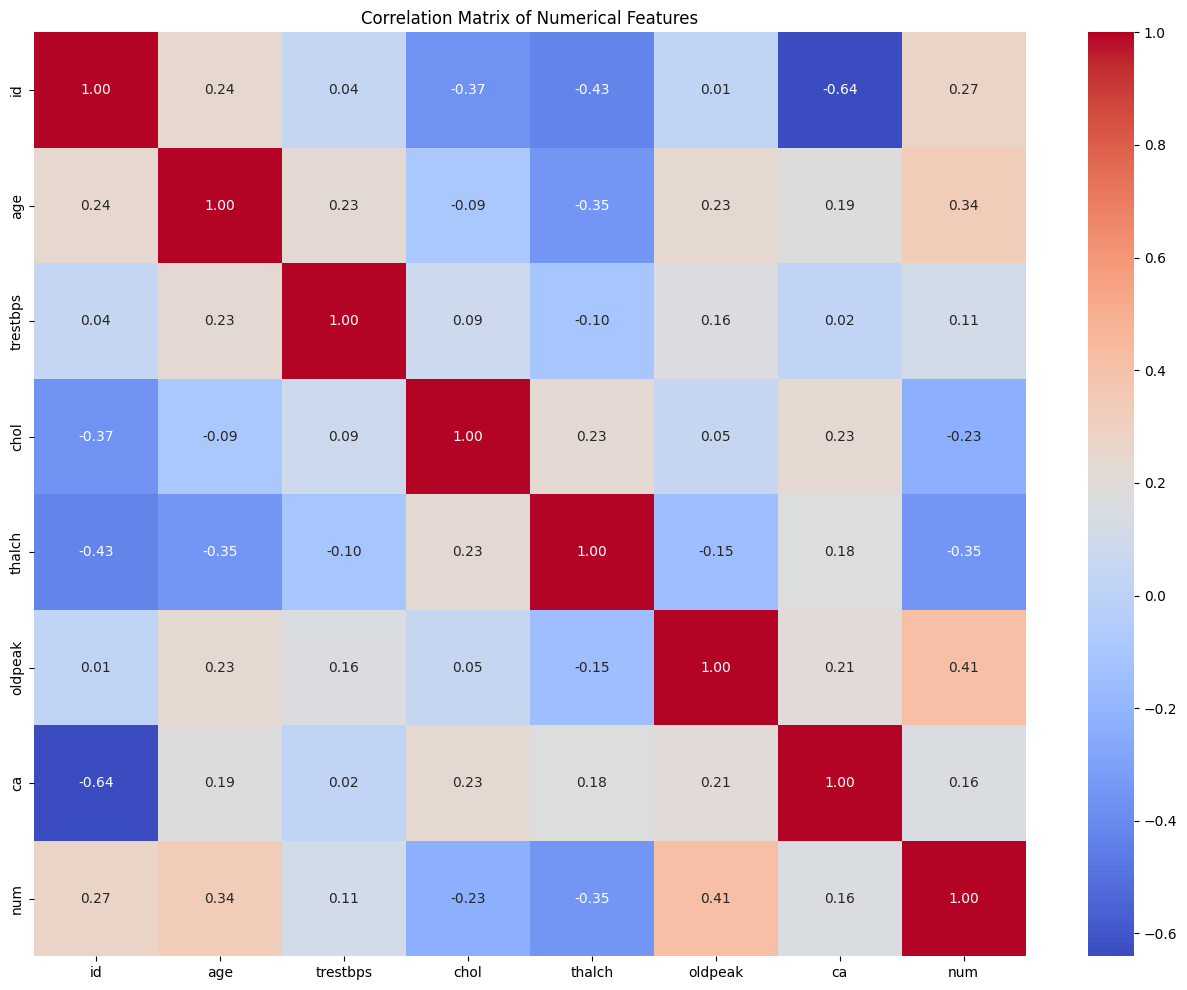

In [44]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## Model Training

In [45]:
# Create binary target column
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [46]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'num'])


In [47]:
X = df.drop('target', axis=1)
y = df['target']


In [48]:
# Encode Categorical Variables
X = pd.get_dummies(X, drop_first=True)


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [51]:
scaler = StandardScaler()

# Fit on training data only, then transform train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Logistic Regression

In [52]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Evaluating models

In [53]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print(f"{name} Accuracy: {accuracy_score(y_test, preds):.4f}")

Logistic Regression Accuracy: 0.8261
Random Forest Accuracy: 0.8424
KNN Accuracy: 0.8424
SVM Accuracy: 0.8478


## Model Evaluation

In [54]:
# Logistic Regression
y_pred_lr = models["Logistic Regression"].predict(X_test_scaled)
print("--- Logistic Regression Performance ---")
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(classification_report(y_test, y_pred_lr, zero_division=0))
print("Logistic Regression Accuracy:", round(lr_accuracy, 4))

# Random Forest
y_pred_rf = models["Random Forest"].predict(X_test_scaled)
print("\n--- Random Forest Performance ---")
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("Random Forest Accuracy:", round(rf_accuracy, 4))

# K-Nearest Neighbors (KNN)
y_pred_knn = models["KNN"].predict(X_test_scaled)
print("\n--- K-Nearest Neighbors (KNN) Performance ---")
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(classification_report(y_test, y_pred_knn, zero_division=0))
print("KNN Accuracy:", round(knn_accuracy, 4))

# Support Vector Machine (SVM)
y_pred_svm = models["SVM"].predict(X_test_scaled)
print("\n--- Support Vector Machine (SVM) Performance ---")
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(classification_report(y_test, y_pred_svm, zero_division=0))
print("SVM Accuracy:", round(svm_accuracy, 4))

scores = [lr_accuracy, rf_accuracy, knn_accuracy, svm_accuracy]

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.84      0.76      0.79        82
           1       0.82      0.88      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.82       184

Logistic Regression Accuracy: 0.8261

--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        82
           1       0.85      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

Random Forest Accuracy: 0.8424

--- K-Nearest Neighbors (KNN) Performance ---
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        82
           1       0.82      0.91      0.87    

## Key Observations from Model Evaluation

**Logistic Regression:**  
- Accuracy: 82.6%  
- Slightly lower recall for class 0 (No Disease → 0.76), but high recall for class 1 (Disease → 0.88).  
- Serves as a good baseline model.

**Random Forest:**  
- Accuracy: 84.2%  
- Slight improvement over Logistic Regression in both classes.  
- F1-score shows balanced performance.

**Support Vector Machine (SVM):**  
- Accuracy: 84.8% (highest among all models)  
- Macro avg and weighted avg F1-score ~0.84 → best overall performance.

**K-Nearest Neighbors (KNN):**  
- Accuracy: 84.2%  
- Close to SVM, indicating KNN captures patterns well too.

**Performance Ranking:**  
SVM > KNN > Random Forest > Logistic Regression (in terms of accuracy)


## Comparison barplot

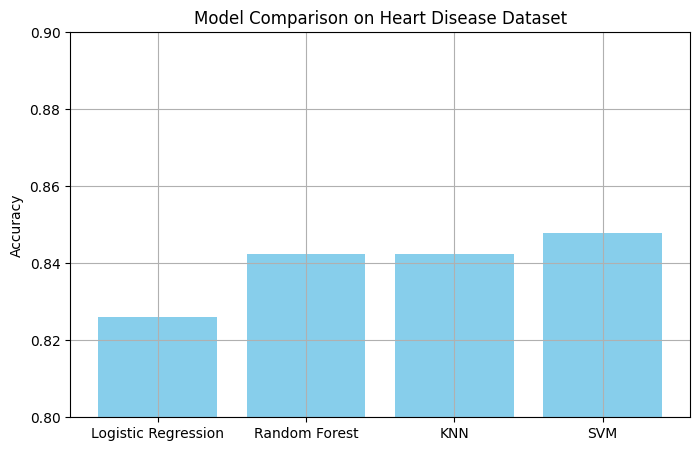

In [55]:
plt.figure(figsize=(8,5))
plt.bar(models.keys(), scores, color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Comparison on Heart Disease Dataset")
plt.ylim(0.8, 0.9)
plt.grid()
plt.show()

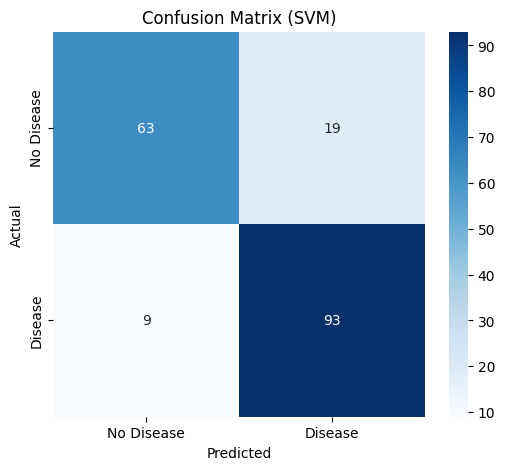

In [56]:
y_pred_svm = models["SVM"].predict(X_test_scaled)

plt.figure(figsize=(6, 5))
sns.heatmap(
    confusion_matrix(y_test, y_pred_svm),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Disease", "Disease"],
    yticklabels=["No Disease", "Disease"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()

After training multiple classification models without pipelines,
- SVM emerged as the best performer with ~84.8% accuracy.
- Logistic Regression served as a strong baseline,
    - while Random Forest and KNN slightly improved performance.
 
Overall, accuracies were close across models, but SVM and KNN showed better generalization.
> For medical applications, recall (detecting patients with heart disease) should be prioritized over accuracy alone, making Logistic Regression and SVM particularly strong candidates.